In [1]:
import geopandas as gpd

blocks_gdf = gpd.read_parquet('./data/blocks.parquet')[['geometry']]
blocks_gdf.head()

,geometry
0,"POLYGON ((354918.622 6625258.829, 354901.464 6..."
1,"POLYGON ((355412.142 6623378.149, 355411.7 662..."
2,"POLYGON ((353934.329 6625429.433, 353923.453 6..."
3,"POLYGON ((355099.099 6623847.765, 355074.808 6..."
4,"POLYGON ((352766.168 6621954.748, 352744.412 6..."


In [2]:
from my_package.methods.spatial_tagger import SpatialTagger

blocks_gdf = SpatialTagger(blocks_gdf).run()

2024-12-17 17:49:13.964 | INFO     | my_package.methods.spatial_tagger:_fetch_osm:36 - Fetching OSM data
2024-12-17 17:49:56.417 | SUCCESS  | my_package.methods.spatial_tagger:_fetch_osm:41 - OSM data fetched
2024-12-17 17:49:56.732 | INFO     | my_package.methods.spatial_tagger:_process_osm:86 - Processing OSM data
100%|██████████| 4/4 [00:06<00:00,  1.69s/it]
2024-12-17 17:50:03.537 | SUCCESS  | my_package.methods.spatial_tagger:_process_osm:104 - OSM data processed
2024-12-17 17:50:03.604 | INFO     | my_package.methods.spatial_tagger:_get_tags:141 - Getting tags
100%|██████████| 3/3 [00:00<00:00, 10.50it/s]
2024-12-17 17:50:05.580 | SUCCESS  | my_package.methods.spatial_tagger:_get_tags:170 - Tags obtained


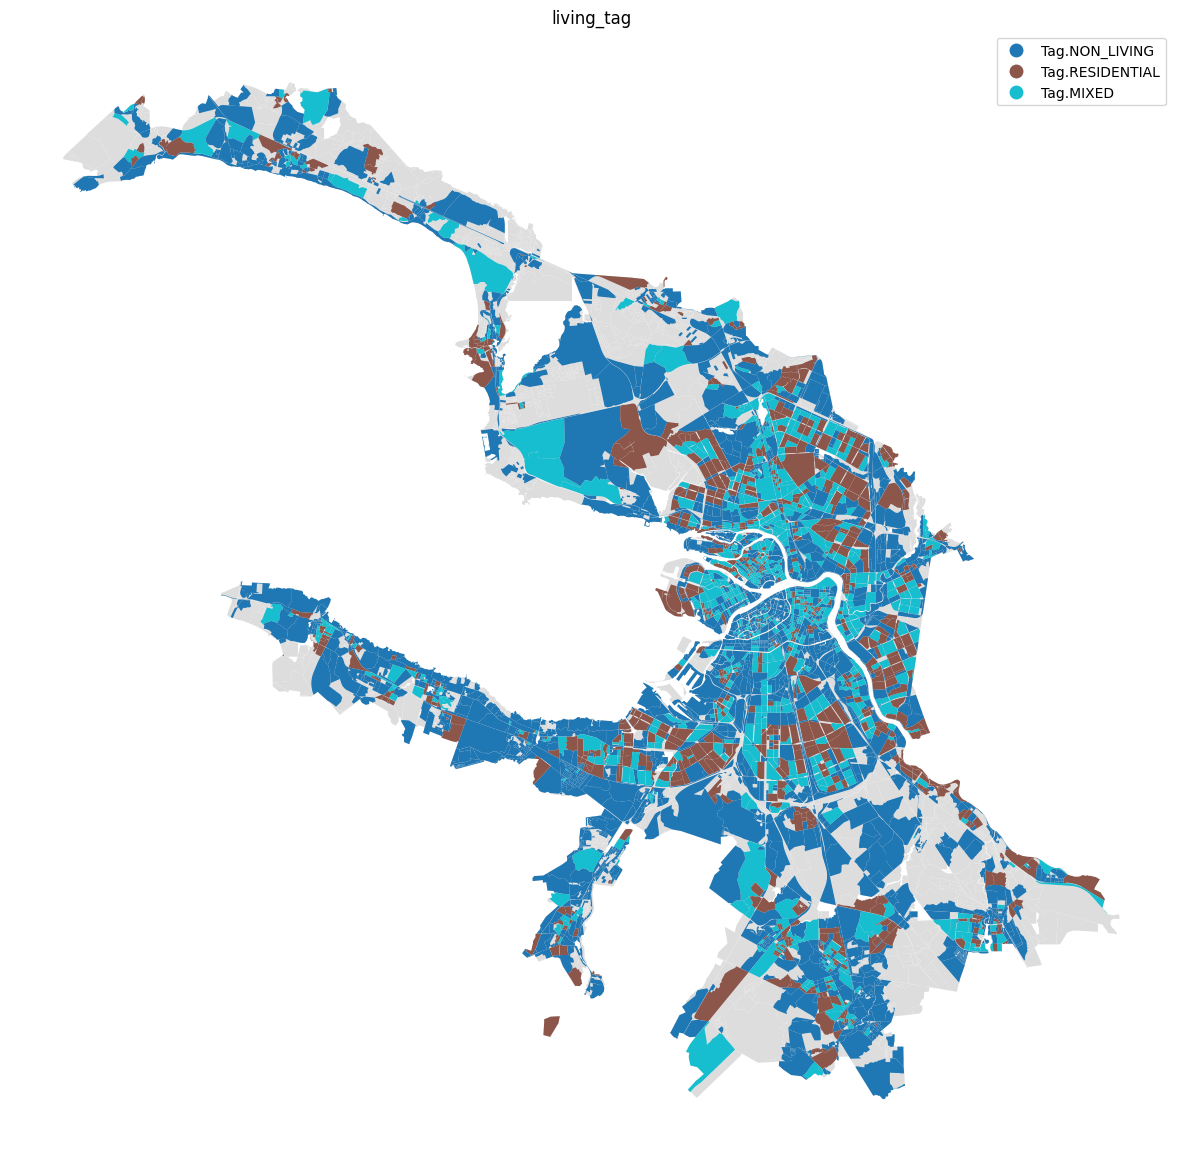

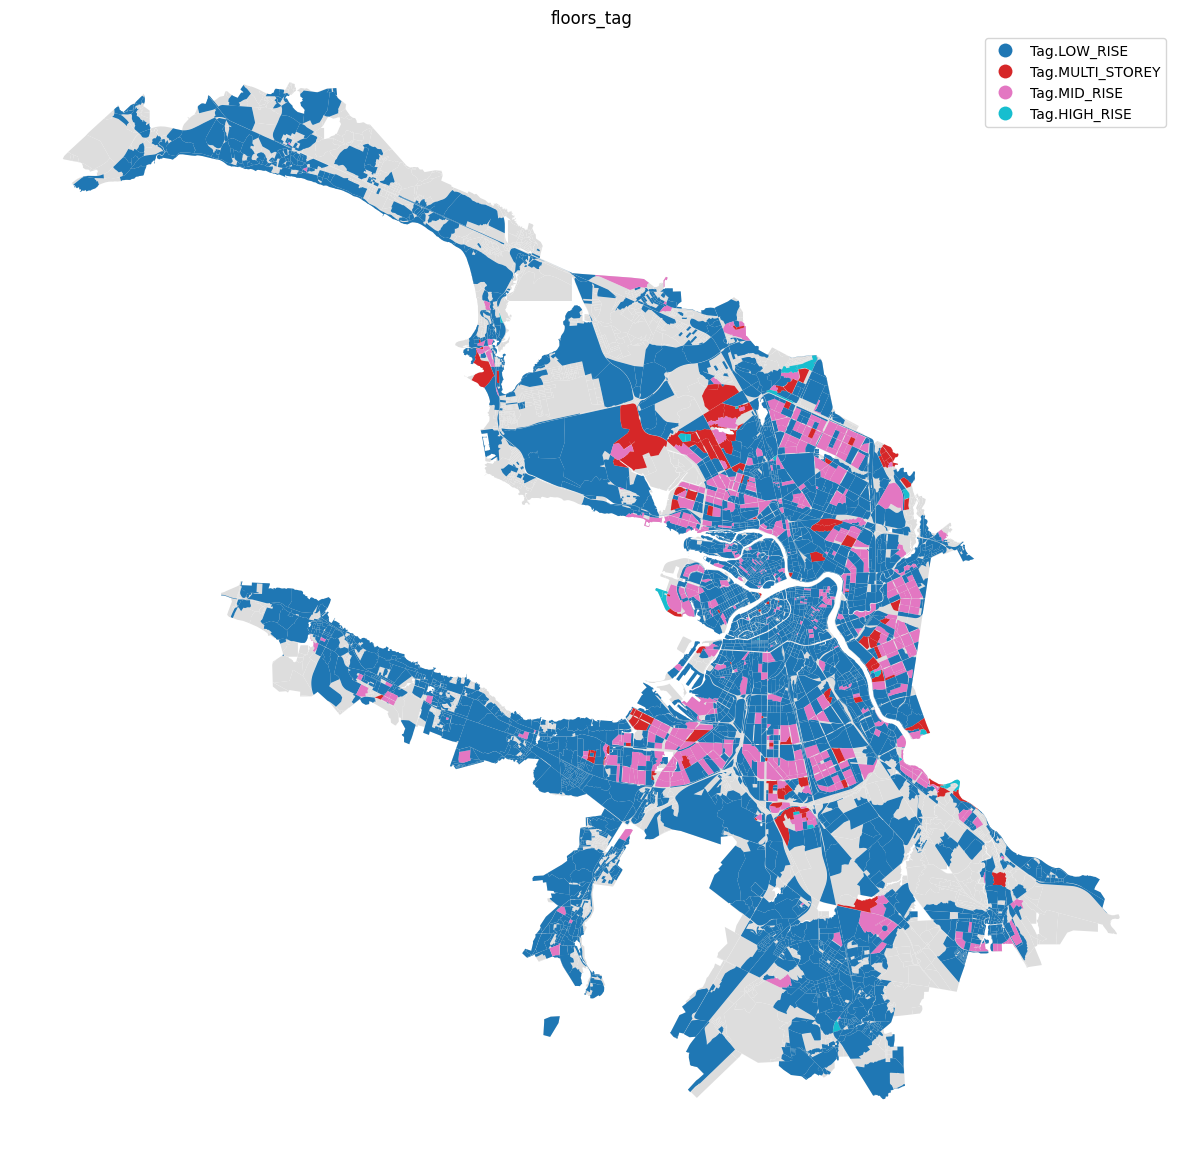

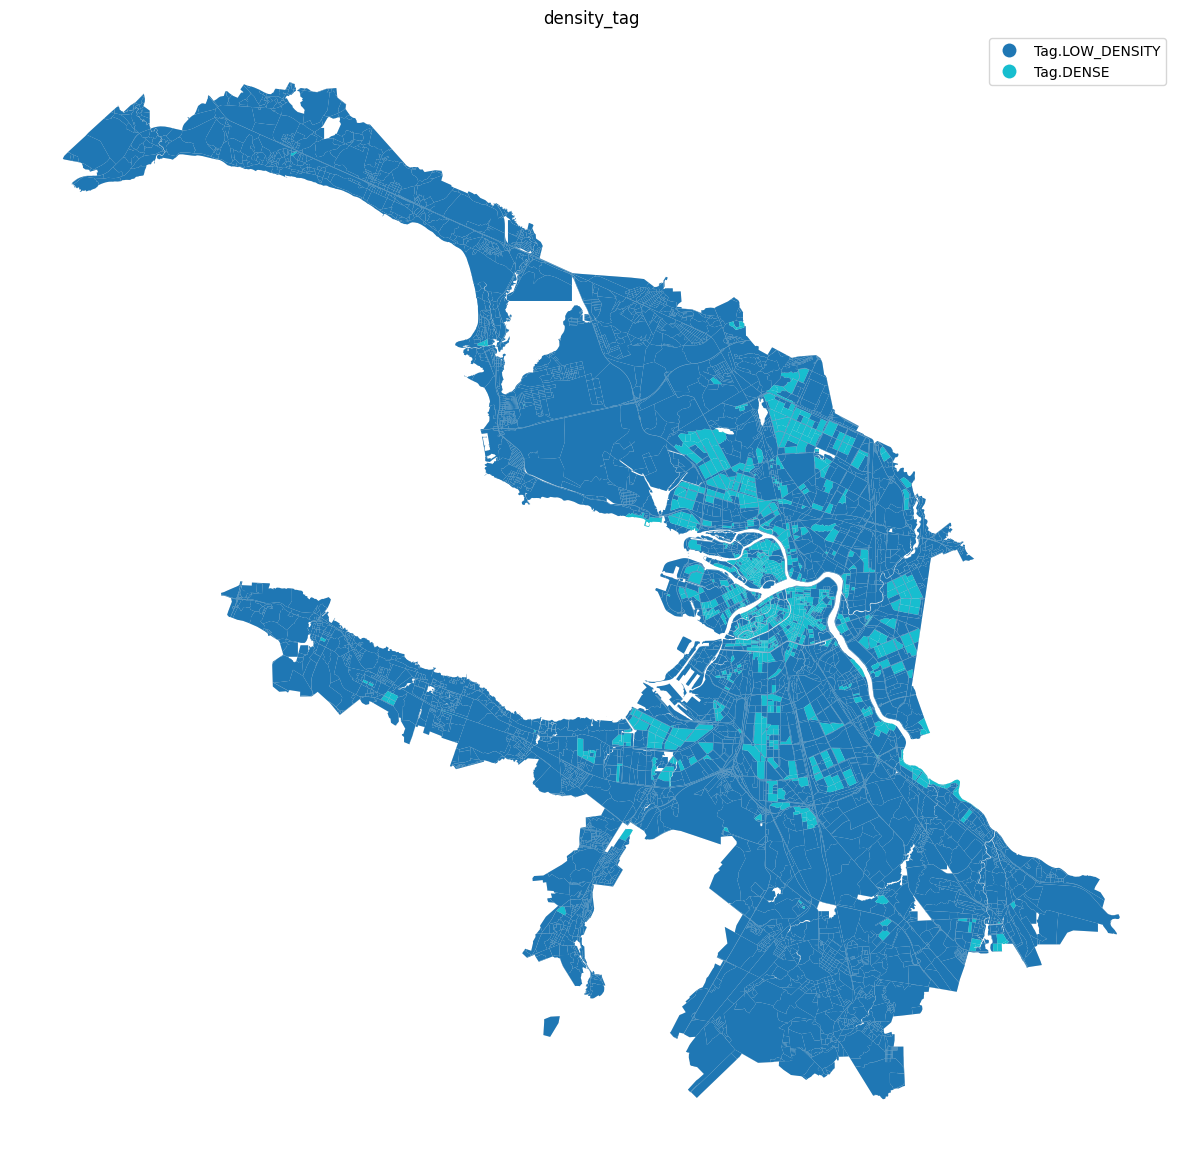

In [3]:
for tag_column in ['living_tag', 'floors_tag', 'density_tag']:
    ax = blocks_gdf.plot(color='#ddd', figsize=(15,15))
    blocks_gdf.plot(column=tag_column, legend=True, ax=ax).set_axis_off()
    ax.set_title(tag_column)